From the power point we have seen that the logistic equation is, 

$$ \hat{p} = \frac{1}{1 + e^{-(mx+b)}} $$

let $z = mx+b $ 

The loss function for logistic regression is

In linear regression, the loss was MSE, y, ypred, (y-ypred)^2


100 data points in the training

100 true ys   and 100 ypred = mx + b = w_1 x_1 + w_2 x_2 + b

we start with initial ws and b and then we keep improving the ws and b so that we can reduce the loss.  




$ L = \sum( -y_i log(\hat{y_i}) - (1 - y_i) log(1 - \hat{y_i}) )$

We are looking at binary classification. True y is either 0 or 1. 

If y = 0 and $\hat{y}=0$ then

$L = \sum(-0 log(0) - (1-0) log(1-0)) = 0$


If y = 1 and $\hat{y}=1$ then

$L = \sum(-1 log(1) - (1-1) log(1-1)) = 0 $


If y = 0 and $\hat{y}=1$ then

$L = \sum(-0 log(1) - (1-0) log(1-1)) = \sum( -1 log(0)) =$  large number.

If y = 1 and $\hat{y}=0$ then

$L = \sum(-1 log(0) - (1-1) log(1-0)) = \sum( -1 log(0)) =$  large number.

When the true y and predicted y don't match, then the error is large. 


The update equation for $m$ and $b$ with $\epsilon$ as a learning rate are:

$m_{new} = m_{old} - \epsilon \frac{\partial L}{\partial m_{old}} $ 

$b_{new} = b_{old} - \epsilon \frac{\partial L}{\partial b_{old}} $

We will consider the credit card fraud dataset from Kaggle for understanding Logistic Regression

https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
print(df.shape)

(284807, 31)


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


look at v1 describe()

mean = 3.919*10^(-15)

min is -56.4

25th Percentile = Q1 = -0.9203

50th percentile = median= Q2 = 0.0181

75th percentile = Q3 = 1.31

max = 2.45


min Q1 median Q3 max

In [7]:
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
dd1 = df['Class'].value_counts()
print(type(dd1))
print(dd1)

<class 'pandas.core.series.Series'>
0    284315
1       492
Name: Class, dtype: int64


In [10]:
no_fraud = df['Class'].value_counts()[0]
fraud = df['Class'].value_counts()[1]

print(type(no_fraud))
print(type(fraud))

print(no_fraud)
print(fraud)

per_no_fraud = round(no_fraud/len(df)*100, 2)
per_fraud = round(fraud/len(df)*100, 2)

print(per_no_fraud)
print(per_fraud)

<class 'numpy.int64'>
<class 'numpy.int64'>
284315
492
99.83
0.17


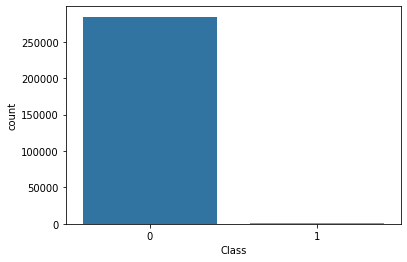

In [11]:
# Let's plot the classes

sns.countplot(x='Class', data=df)

++++++++
[0.0, 25691.16]


(0.0, 172792.0)

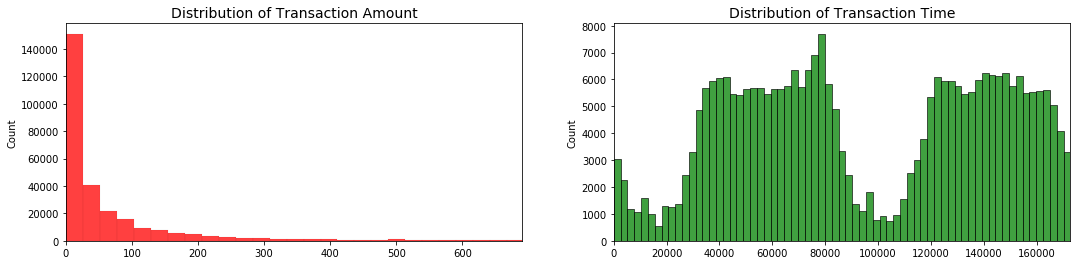

In [12]:
# Let's plot distribution of Amount and Time columns separately

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r', bins=1000)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)-25000])
print("++++++++")
print([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='g')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



Reason behind scaling: 

Example - housing dataset. zipcode, address, city, bedrooms, bathrooms, built-in-area square-feet, lot area, ..., price.

Scaling will help us remove units for each feature. 

There are several scaler transformations. We will consider the following 
three:
    
    1) StandardScaler - this is similar to Standard Normal Distriution. Before this is done, we have to check if the column follows normal distribution. After applying this transformation, data's mean will be zero and its standard deviation will be one.
    
    2) MinMaxScaler - transforms the data to fit into range [0,1] or [-1,1] if data comprises of negative values.  
    
    3) RobustScaler - is a preprocessing method that removes outliers by considering values between 1st Quartile (25th percentile) and 3rd Quartile (75th percentile). 
    
    
    
 https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [13]:
# Note that except for Amount and Time columns, all other 
# columns have been scaled. Let's scale these to columns


from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler() # object 

In [14]:
# Let's remove outliers from the Amount and Time columns
# we are creating two new columns, one for Amount and another one for Time

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274,-0.994983
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825,-0.994983
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721,-0.994972
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291,-0.994972
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579,-0.994960


In [16]:
df.drop(["Time", "Amount"],axis = 1, inplace=True)

In [17]:
# (284807, 31)

print(df['scaled_amount'].shape)

(284807,)


In [18]:
"""
# We will create a subsample that has balanced data

df = df.sample(frac=1) 

fraud_data = df.loc[df["Class"]==1] # is a dataframe
print(fraud_data.shape)

non_fraud_data = df.loc[df["Class"]==0][:492] # is a dataframe
print(non_fraud_data.shape)

new_concat = pd.concat([fraud_data, non_fraud_data]) # concat will stack one over the other

print(new_concat)

# shuffle the rows in the dataframe 
new_df = new_concat.sample(frac=1, random_state=42)

new_df.head()
"""


'\n# We will create a subsample that has balanced data\n\ndf = df.sample(frac=1) \n\nfraud_data = df.loc[df["Class"]==1] # is a dataframe\nprint(fraud_data.shape)\n\nnon_fraud_data = df.loc[df["Class"]==0][:492] # is a dataframe\nprint(non_fraud_data.shape)\n\nnew_concat = pd.concat([fraud_data, non_fraud_data]) # concat will stack one over the other\n\nprint(new_concat)\n\n# shuffle the rows in the dataframe \nnew_df = new_concat.sample(frac=1, random_state=42)\n\nnew_df.head()\n'

In [19]:
new_df = df

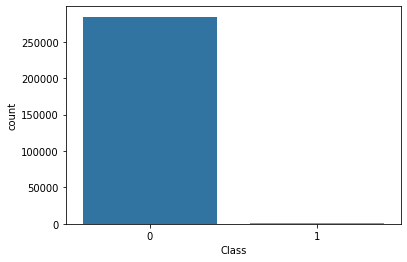

In [20]:
sns.countplot(x="Class", data=new_df)
plt.show()

Correlation Matrix

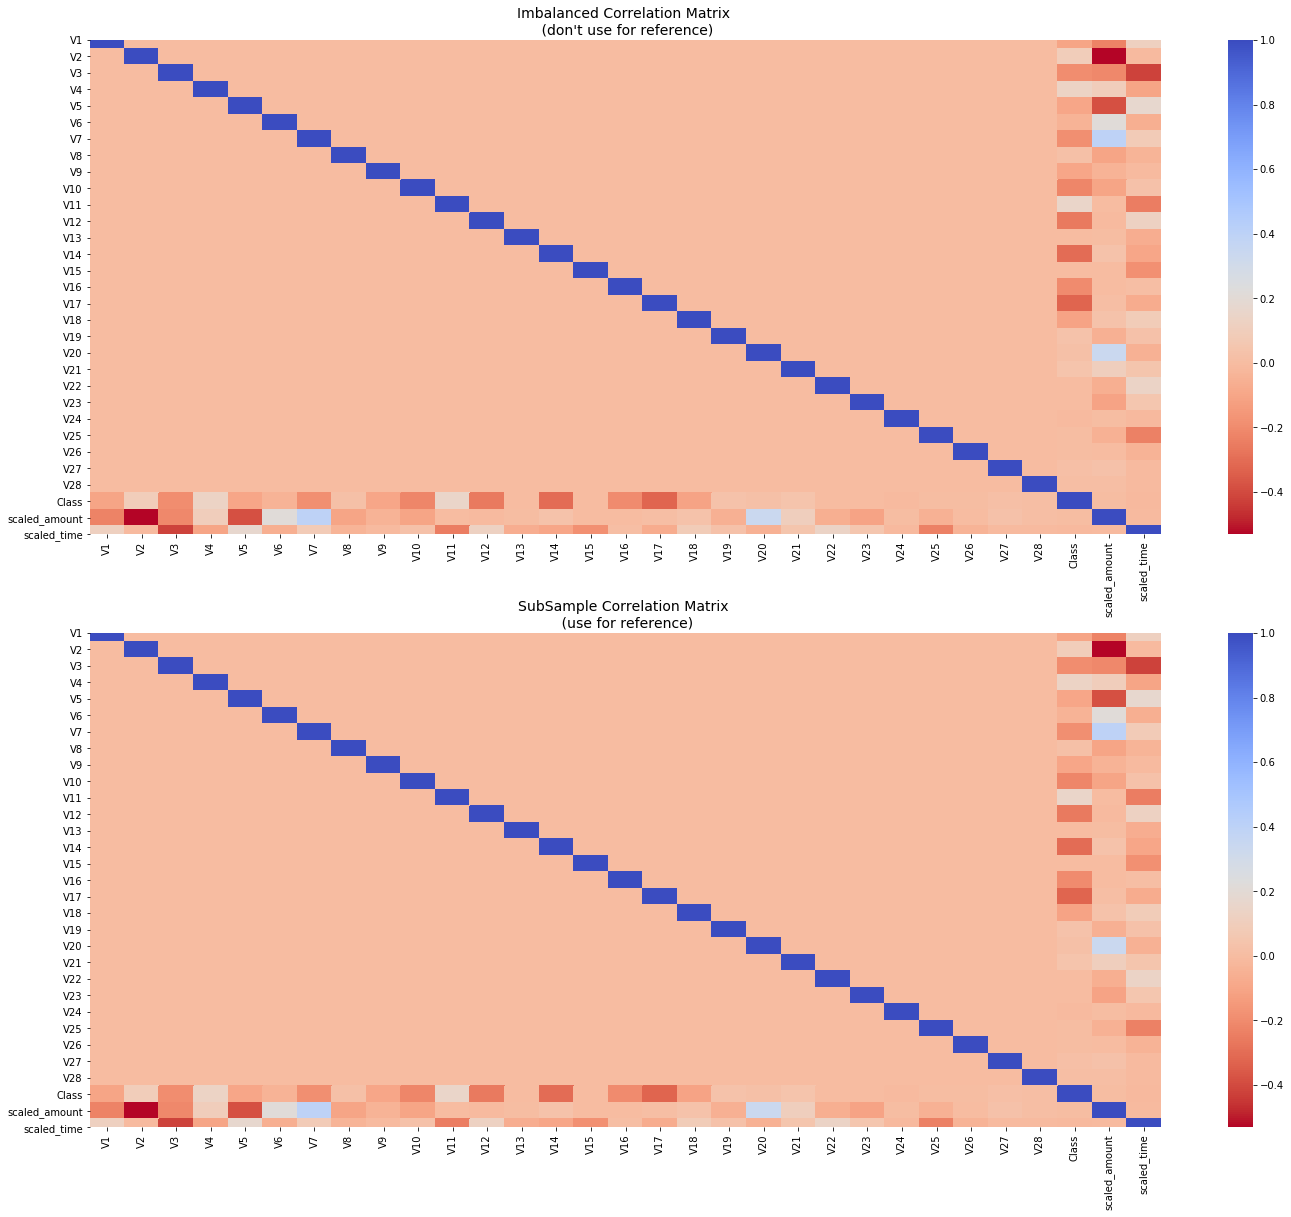

In [21]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [22]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
V1,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.101347,-0.227709,0.117396
V2,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.091289,-0.531409,-0.010593
V3,-0.000000,0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.192961,-0.210880,-0.419618
V4,0.000000,-0.000000,-0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.133447,0.098732,-0.105260
V5,0.000000,-0.000000,-0.000000,-0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.094974,-0.386356,0.173072
V6,0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.043643,0.215981,-0.063016
V7,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.187257,0.397311,0.084714
V8,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.019875,-0.103079,-0.036949
V9,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.097733,-0.044246,-0.008660
V10,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.216883,-0.101502,0.030617


In [23]:
# x will contain all columns except the target column which is "Class"
x = new_df.drop('Class', axis=1)
y = new_df['Class']

In [24]:
#print(x.shape)

print(new_df.shape)

(284807, 31)


In [25]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
# we are creating an instance of StandardScaler class and then performing a fit on x_train to obtain 
# mean and standard deviation for x-train
# then use it to transorm both x_train and x_test

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train) # mean and standard deviation for x-train

train_sc = scaler.transform(x_train) 

test_sc = scaler.transform(x_test)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression(penalty='l2', C=1, solver='lbfgs')

In [29]:
import numpy as np

print(y_train.shape)
y_train = np.array(y_train).flatten()
print(y_train.shape)

(227845,)
(227845,)


In [30]:
print(train_sc[0:5])

[[ 0.99785119 -0.22962626 -0.20738468  0.23421529 -0.36779128 -0.0640219
  -0.50588871  0.03060393  0.95995457 -0.02686352  0.61149957  1.68999033
   1.26149805 -0.26397318 -0.36292946  0.34942719 -1.09376318  0.77802759
   0.20615616 -0.1625072   0.32483903  1.3366986   0.08456891 -0.45980186
  -0.08436785 -0.44894226  0.11248883 -0.14374055 -0.30788875  1.02255459]
 [-0.205221   -0.37821992  1.02754428 -1.42410102 -0.07838016  0.12636396
   0.01356656 -0.3375587   0.03591349  0.56353152 -1.90538969 -0.72394599
   1.06569947 -1.24378077  0.69040336 -0.18326043 -1.91526546  2.51448298
  -2.07894444 -0.60819501 -0.2097972   0.58308608  0.18062005 -1.65808442
  -2.25335207  0.7505885  -0.92189789 -0.43984143 -0.1670264   0.47128275]
 [ 0.03655821  0.49556347 -0.37003324 -0.50036261  0.77785588 -0.26841443
   0.63270968  0.09898619 -0.12048361 -0.58617635  0.51056685 -0.07124077
  -1.01293822 -0.6673091  -0.8774263   0.77213325  0.05138277  0.6232037
   0.24396219  0.01528258 -0.42976698 

In [31]:
model.fit(train_sc, y_train)

LogisticRegression(C=1)

In [32]:
print(test_sc.shape)

(56962, 30)


In [33]:
ypred = model.predict(test_sc)

In [34]:
print(x_train.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount',
       'scaled_time'],
      dtype='object')


In [35]:
# to get coefficients and intercepts use the following command
print(model.coef_, model.intercept_)

[[ 0.25953087 -0.04276643 -0.08119485  0.92965134  0.18975237 -0.12767235
  -0.15404853 -0.23435087 -0.31602012 -0.73605569 -0.12963968  0.04133451
  -0.26924142 -0.60868053 -0.11155076 -0.18347191 -0.04082976  0.00244398
   0.05543869 -0.35514666  0.29118893  0.52626497 -0.07600845  0.05403221
  -0.06605748  0.00651681 -0.35260392 -0.14244479  0.23907782 -0.34107793]] [-8.66466757]


In [36]:
from sklearn.model_selection import cross_val_score

Cross validation - k fold

let us say k = 5

training data is divided into 5 parts: d1, d2, d3, d4, d5

Four parts will be used for training and 1 part will be used for testing. 

first run: for training we use d1, d2, d3, d4 and testing we use d5

second run: for training we use d2, d3, d4, d5 and testing we use d1

third run: d3, d4, d5, d1 for training and d2 for testing

fourth run: d4, d5, d1, d2 for training and d3 for testing

fifth run: d1, d2, d3, d5 for training and d4 for testing

...

In [37]:
log_reg_score = cross_val_score(model, train_sc, y_train, cv=5)
print(log_reg_score)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

[0.99927582 0.9991661  0.99920999 0.99910027 0.99934166]
Logistic Regression Cross Validation Score:  99.92%


#### Confusion Matrix

Is a table that gives a visual representation of performance of a classification. Each row in the table represents the instances in an actual class and each column represents the instances in a predicted class. Rows and columns can be interchanged.  

<img src ="confusion_matrix.png" width = 300, height = 200>

#### False Positive is known as Type I error and False Negative is known as Type II error. 

Let's consider another matrix and compute come metrics

<img src ="confusion_matrix2.png" width = 500, height = 400>

Important metrics

Recall = Sensitivity = True Positive rate = $\frac{TP}{TP+FN}$ 

Precision = Positive Predictive Value = $\frac{TP}{TP+FP} $  

Accuracy = $ \frac{TP+TN}{TP+TN+FP+FN} $

Specificity = True Negative rate = $ \frac{TN}{FP+TN} $ 

False Positive Rate = $\frac{FP}{FP+TN} $  = 1 - TNR = 1 - Specificity  

F1 score is an harmonic mean of Recall and Precision, 
F1 = $\frac{2*Precision*Recall}{Precision+Recall} $



Receiver Operating Characteristic curve, ROC curve is computed by plotting the True Positive Rate (TPR) with False Positive Rate (FPR) for different thresholds. 

<img src ="ROC_curves.svg" width = 400, height = 300>


Area Under the Receciver Operating Characteristic Curve, AUCROC, measures the separability of classes. Area close to 1 means the classes are properly classified. AUC under 0.5 means the classification is not good. 

Images courtesy of Wiki

recall = TP/(TP+FN) 

recall will be close to 1 or 100% when FN is small

TP = 55, TN = 30, FP = 5, FN = 10

55/(55+10) = 55/65 = 0.85

what if FN=5

55/(55+5) = 0.92 

Goal is recall will be high, if FN is low.

precision = TP/(TP+FP)

55/(55+5) = 55/60 = 0.92

what if FP = 1

55/(55+1) = 55/56 = 0.98

Goal is precision will be high, if FP is low.

Recall, Precision, Accuracy, F1-score

### Building Confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)

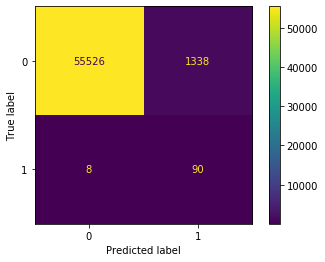

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_) 
disp.plot()
plt.show()  

In [59]:
from sklearn.metrics import accuracy_score
print("Base rate accuracy is: %0.2f" %(accuracy_score(y_test, ypred)))

Base rate accuracy is: 0.98


### PLotting ROC 

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [61]:
logit_roc_auc = roc_auc_score(y_test, ypred)
print("Logistic AUC = %0.2f" %logit_roc_auc)
print(classification_report(y_test, ypred))

Logistic AUC = 0.95
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [62]:
from sklearn.metrics import roc_curve
print(test_sc.shape)
print(y_test[0:5])
b = model.predict_proba(test_sc)[:,1]
print(b[0:5])
fpr, tpr, threshold = roc_curve(y_test, b)

(56962, 30)
43428     1
49906     0
29474     0
276481    0
278846    0
Name: Class, dtype: int64
[1.         0.02493921 0.02464085 0.02327942 0.01160598]


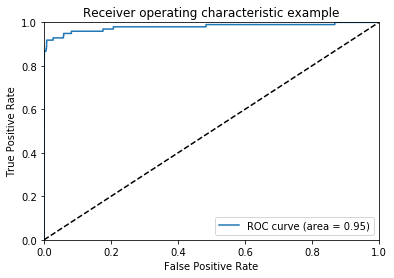

In [63]:
# plotting ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [64]:
df1 = df.copy(deep=True)
df2 = df.copy(deep=True)
